In [78]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import pickle
from flask import Flask
from flask import render_template
import numpy as np
from flask import request

In [2]:
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_excel("placment_dataset_prediction.xlsx")

In [5]:
df.head()

,Company,Position,Package,Passing Year,Percentage,Column1,_1,_2
0,MNC,Trainee - Computer Application,180000.0,2020,75,NaN,NaN,Startup
1,MNC,Trainee - Computer Application,180000.0,2021,82,NaN,NaN,Startup
2,MNC,Trainee - Computer Application,180000.0,2022,68,NaN,NaN,Startup
3,MNC,Trainee Executive,154000.0,2023,91,NaN,NaN,Startup
4,MNC,Trainee Executive,154000.0,2024,85,NaN,NaN,Startup


# Dropping columns not used in analysis

In [6]:
df = df.drop(columns=['Column1','_1','_2'], axis=1)

In [7]:
df.head()

,Company,Position,Package,Passing Year,Percentage
0,MNC,Trainee - Computer Application,180000.0,2020,75
1,MNC,Trainee - Computer Application,180000.0,2021,82
2,MNC,Trainee - Computer Application,180000.0,2022,68
3,MNC,Trainee Executive,154000.0,2023,91
4,MNC,Trainee Executive,154000.0,2024,85


In [8]:
df['A_I_rating'] = np.random.randint(5, 11, size=len(df))

# Renaming columns

In [17]:
df.rename(columns={'Company':'company','Position':'position','Package':'package','Passing Year':'pass_yr','Percentage':'percentage'}, inplace=True)

In [18]:
df.head()

,company,position,package,pass_yr,percentage,A_I_rating
0,MNC,Trainee - Computer Application,180000.0,2020,75,7
1,MNC,Trainee - Computer Application,180000.0,2021,82,9
2,MNC,Trainee - Computer Application,180000.0,2022,68,9
3,MNC,Trainee Executive,154000.0,2023,91,6
4,MNC,Trainee Executive,154000.0,2024,85,5


# Describeing dataset for Statistical information

In [19]:
df.describe()

,package,pass_yr,percentage,A_I_rating
count,2.750000e+02,285.000000,285.000000,285.000000
mean,2.624509e+05,2020.600000,76.000000,7.494737
std,3.413438e+05,2.401877,10.072624,1.675467
min,9.000000e+04,2014.000000,52.000000,5.000000
25%,1.540000e+05,2019.000000,68.000000,6.000000
50%,1.909260e+05,2021.000000,77.000000,7.000000
75%,2.750000e+05,2023.000000,85.000000,9.000000
max,2.202000e+06,2024.000000,93.000000,10.000000


In [20]:
df.isnull().sum()

company        0
position      10
package       10
pass_yr        0
percentage     0
A_I_rating     0
dtype: int64

# Dropping Duplicate records

In [21]:
df.duplicated().sum()

0

In [22]:
df.drop_duplicates(inplace=True)

In [23]:
df.duplicated().sum()

0

# Value count of each column

In [24]:
# value count of 'company'
df['company'].value_counts()

company
MNC        157
Startup    128
Name: count, dtype: int64

In [25]:
#value count of 'position'
df['position'].value_counts()

position
Graduate Trainee                             35
Scholar Trainee                              28
ÿScholar Trainee                             21
Trainee Transaction Processing Officer       20
Analyst                                      18
Trainee Transaction Processing Officer       17
Jr. QA Engineer / QA Engineer                10
Associate                                     9
Operation Executive                           9
System Engineer                               9
Sales Consultant                              8
Trainee Executive                             8
Subject Matter Expert                         7
Sales Trainee                                 6
Digital Marketing - Trainee                   5
QA Automation / Manual Tester(Selenium)       5
Talent Acquisition Trainee                    5
Trainee Software Engineer                     4
BPM Process                                   4
Associate Consultant                          3
Trainee - Computer Application 

In [26]:
#value count of 'package'
df['package'].value_counts()

package
185856.0     41
152000.0     37
190926.0     29
180000.0     21
275000.0     18
280000.0     15
220000.0     10
120000.0      9
192000.0      9
2202000.0     8
276000.0      8
154000.0      8
144000.0      7
250000.0      7
96000.0       5
193158.0      5
225000.0      4
300000.0      4
320000.0      4
200000.0      4
350000.0      3
153252.0      3
168000.0      2
380000.0      2
325000.0      2
364000.0      2
280010.0      1
240000.0      1
156000.0      1
90000.0       1
288000.0      1
333500.0      1
251999.0      1
391989.0      1
Name: count, dtype: int64

In [27]:
# value count of passing year
df['pass_yr'].value_counts()

pass_yr
2020    38
2021    38
2022    38
2023    38
2024    38
2019    35
2018    27
2017    18
2016    10
2015     4
2014     1
Name: count, dtype: int64

In [28]:
#value count of percentage
df['percentage'].value_counts()

percentage
88    20
82    14
90    14
66    12
72    11
74    10
78     9
81     9
75     9
73     9
79     9
80     8
71     8
77     8
85     8
70     8
86     8
76     8
68     8
87     8
89     7
84     7
63     6
64     6
69     6
67     6
65     5
91     5
83     5
61     5
54     4
58     4
62     4
55     3
60     3
59     3
92     3
53     1
52     1
93     1
57     1
56     1
Name: count, dtype: int64

In [29]:
# value count of Aptitude and interview rating (A_I_rating)
df['A_I_rating'].value_counts()

A_I_rating
7     57
6     52
10    48
9     44
8     43
5     41
Name: count, dtype: int64

# Handeling missing values

In [30]:
df.isnull().sum()

company        0
position      10
package       10
pass_yr        0
percentage     0
A_I_rating     0
dtype: int64

Filling the missing cells with mode(mostly repeated value) of particular column

In [31]:
df['position'].fillna(df['position'].mode()[0], inplace=True)

In [32]:
df['package'].fillna(df['package'].mode()[0], inplace=True)

In [33]:
df.isnull().sum()

company       0
position      0
package       0
pass_yr       0
percentage    0
A_I_rating    0
dtype: int64

In [34]:
df['company'] = df['company'].str.strip()

In [35]:
df['company'] = df['company'].str.lower()

In [36]:
df['company'].value_counts()

company
mnc        157
startup    128
Name: count, dtype: int64

In [37]:
#remove commas and non numeric characters and change datataype

df['package'] = df['package'].replace('[^0-9]', '', regex=True).astype(int)

In [38]:
df.head()

,company,position,package,pass_yr,percentage,A_I_rating
0,mnc,Trainee - Computer Application,180000,2020,75,7
1,mnc,Trainee - Computer Application,180000,2021,82,9
2,mnc,Trainee - Computer Application,180000,2022,68,9
3,mnc,Trainee Executive,154000,2023,91,6
4,mnc,Trainee Executive,154000,2024,85,5


#  Data Visualization

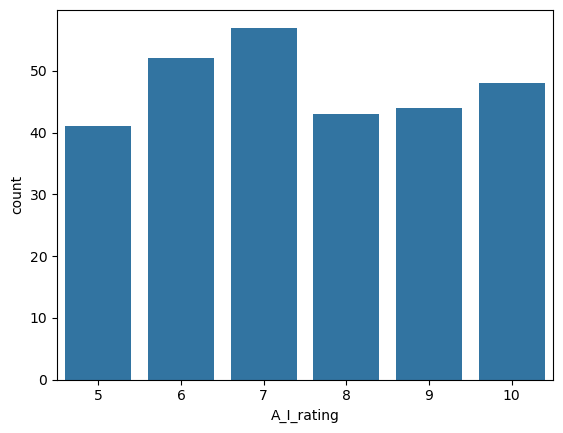

In [39]:
# count plot
sns.countplot(x='A_I_rating', data=df)
plt.show()

<BarContainer object of 285 artists>

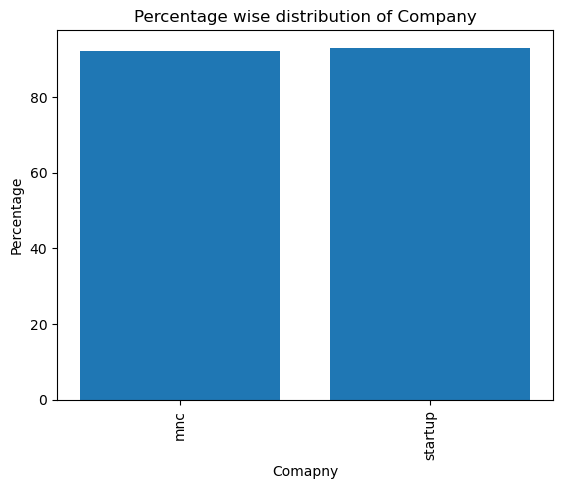

In [40]:
# Bar plot
x = df['company']
y= df['percentage']
plt.xlabel('Comapny')
plt.ylabel('Percentage')
plt.title('Percentage wise distribution of Company')
plt.xticks(rotation = 90)
plt.bar(x,y)

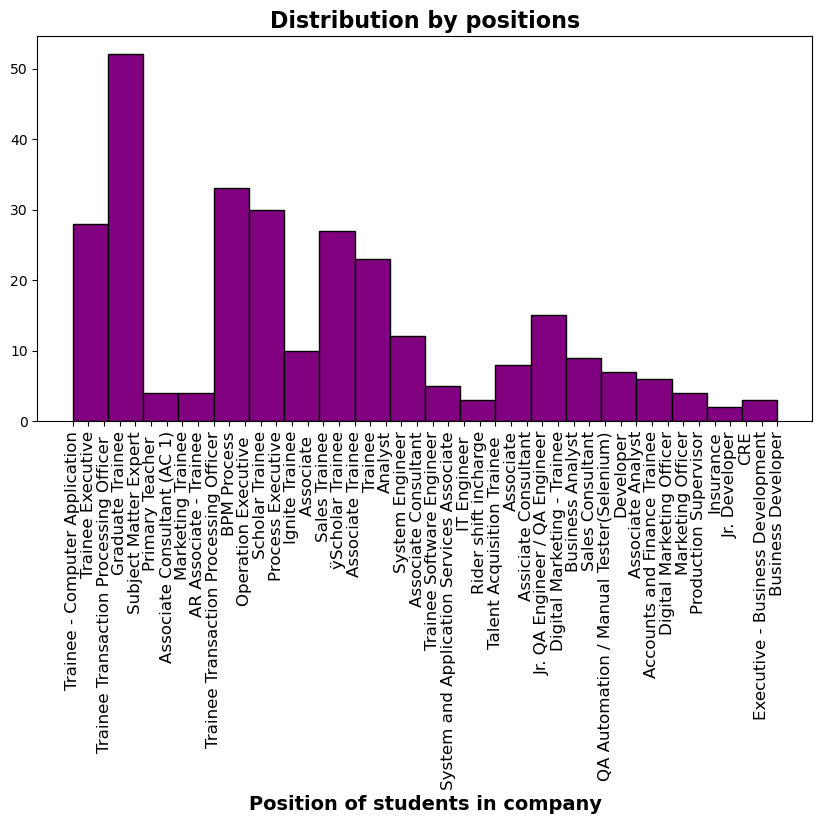

In [41]:
#Histogram

plt.figure(figsize=(10,5))
plt.hist(df['position'],bins=20, color='purple', edgecolor ='black')
plt.xlabel('Position of students in company', fontsize=14, fontweight='bold')
plt.title('Distribution by positions', fontsize=16, fontweight='bold')
plt.xticks(rotation=40, fontsize=12, color='black')
plt.xticks(rotation=90)
plt.show()

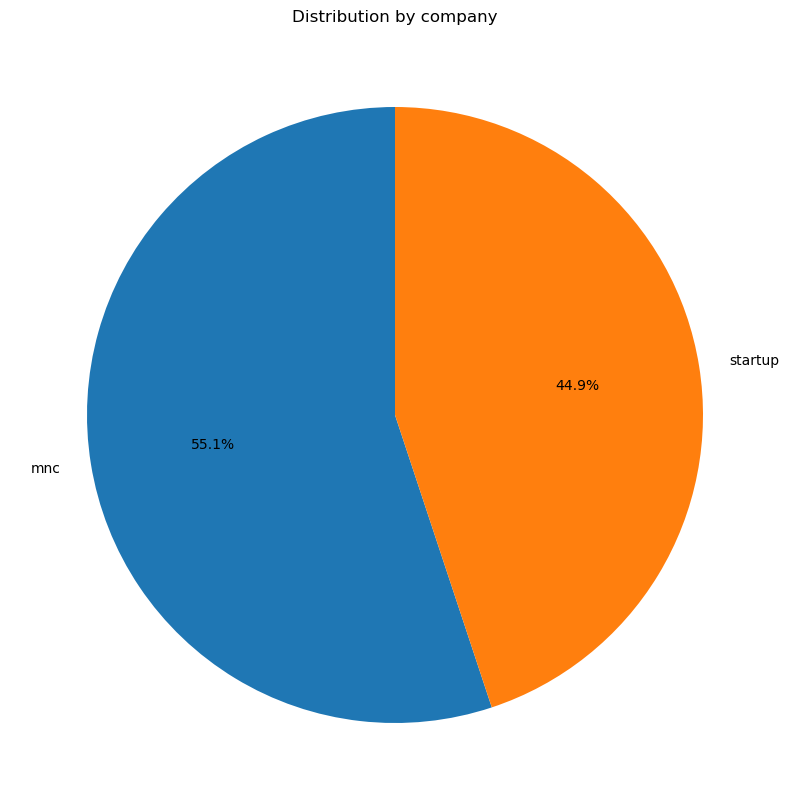

In [42]:
# Pie chart
com_counts = df['company'].value_counts()
plt.figure(figsize=(10,10))
plt.pie(com_counts, labels=com_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution by company')
plt.show()

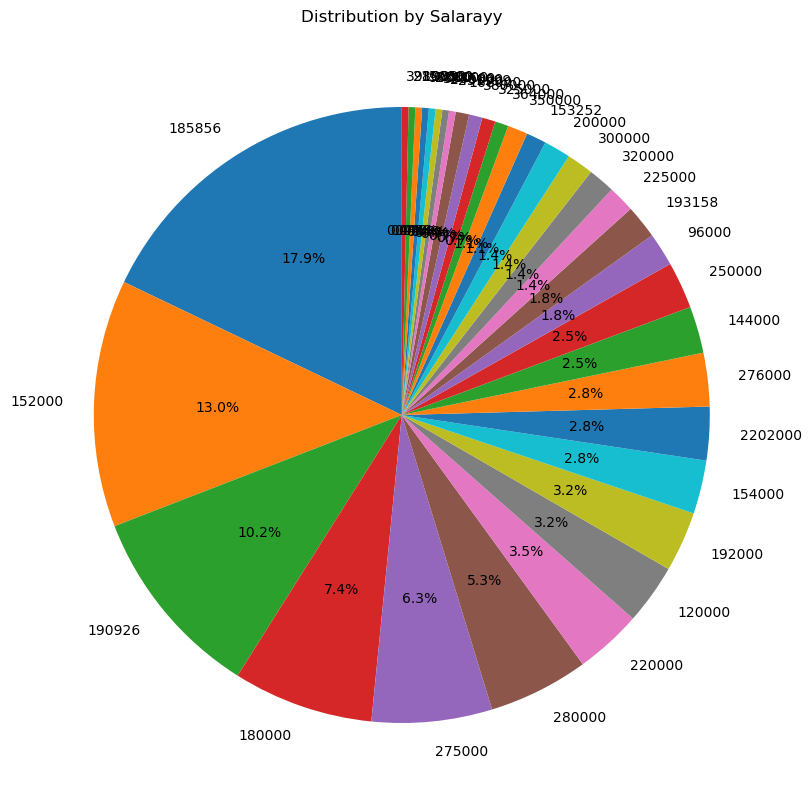

In [43]:
com_counts = df['package'].value_counts()
plt.figure(figsize=(10,10))
plt.pie(com_counts, labels=com_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution by Salarayy')
plt.show()

# EDA

In [44]:
import sweetviz as sz

In [45]:
report = sz.analyze(df)
report.show_html("report.html")

                                             |          | [  0%]   00:00 -> (? left)

Report report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# Label encoding

In [55]:
df['company'].unique()

array(['mnc', 'startup'], dtype=object)

In [56]:
df.replace({'company':{'mnc':0, 'startup':1}}, inplace=True)

In [57]:
df['company'].unique()

array([0, 1], dtype=int64)

In [47]:
df['position'].unique()

array(['Trainee - Computer Application', 'Trainee Executive',
       'Trainee Transaction Processing Officer ', 'Graduate Trainee',
       'Subject Matter Expert', 'Primary Teacher ',
       'Associate Consultant (AC 1)', 'Marketing Trainee',
       'AR Associate - Trainee', 'Trainee Transaction Processing Officer',
       'BPM Process', 'Operation Executive ', 'Scholar Trainee',
       'Process Executive', 'Ignite Trainee', 'Associate ',
       'Sales Trainee', 'ÿScholar Trainee', 'Associate Trainee',
       'Trainee', 'Analyst', 'System Engineer', 'Associate Consultant',
       'Trainee Software Engineer',
       'System and Application Services Associate', 'IT Engineer ',
       'Rider shift incharge', 'Talent Acquisition Trainee ', 'Associate',
       'Assiciate Consultant', 'Jr. QA Engineer / QA Engineer',
       'Digital Marketing - Trainee', 'Business Analyst',
       'Sales Consultant', 'QA Automation / Manual Tester(Selenium)',
       'Developer', 'Associate Analyst', 'Account

In [50]:

df.replace({'position':{'Trainee - Computer Application':0, 'Trainee Executive':1,
       'Trainee Transaction Processing Officer ':2, 'Graduate Trainee':3,
       'Subject Matter Expert':4, 'Primary Teacher ':5,
       'Associate Consultant (AC 1)':6, 'Marketing Trainee':7,
       'AR Associate - Trainee':8, 'Trainee Transaction Processing Officer':9,
       'BPM Process':10, 'Operation Executive ':11, 'Scholar Trainee':12,
       'Process Executive':13, 'Ignite Trainee':14, 'Associate ':15,
       'Sales Trainee':16, 'ÿScholar Trainee':17, 'Associate Trainee':18,
       'Trainee':19, 'Analyst':20, 'System Engineer':21, 'Associate Consultant':22,
       'Trainee Software Engineer':23,
       'System and Application Services Associate':24, 'IT Engineer ':25,
       'Rider shift incharge':26, 'Talent Acquisition Trainee ':27, 'Associate':28,
       'Assiciate Consultant':29, 'Jr. QA Engineer / QA Engineer':30,
       'Digital Marketing - Trainee':31, 'Business Analyst':32,
       'Sales Consultant':33, 'QA Automation / Manual Tester(Selenium)':34,
       'Developer':35, 'Associate Analyst':36, 'Accounts and Finance Trainee':37,
       'Digital Marketing Officer':38, 'Marketing Officer':39,
       'Production Supervisor':40, 'Insurance':41, 'Jr. Developer':42, 'CRE':43,
       'Executive - Business Development':44, 'Business Developer':45}}, inplace=True)

In [58]:
df['company'].unique()

array([0, 1], dtype=int64)

In [59]:
df['position'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45], dtype=int64)

In [60]:
# Retrieve the mapping of text labels to numeric values
#label_mapping_com = dict(zip(encode.classes_, df['company']))
#label_mapping_pos = dict(zip(encode.classes_, df['position']))
# Display the mapping
#print(label_mapping_com)
#print(label_mapping_pos)

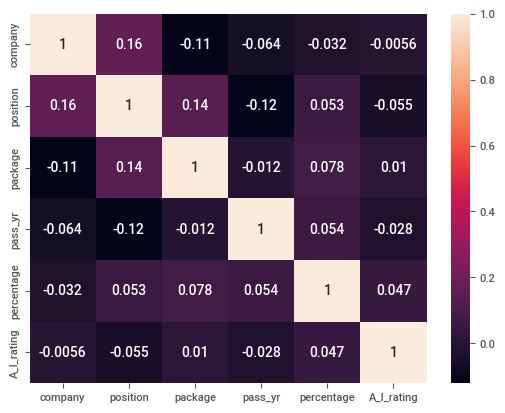

In [61]:
#heatmap
sns.heatmap(df.corr(), annot =True)
plt.show()

array([[<Axes: title={'center': 'company'}>,
        <Axes: title={'center': 'position'}>],
       [<Axes: title={'center': 'package'}>,
        <Axes: title={'center': 'pass_yr'}>],
       [<Axes: title={'center': 'percentage'}>,
        <Axes: title={'center': 'A_I_rating'}>]], dtype=object)

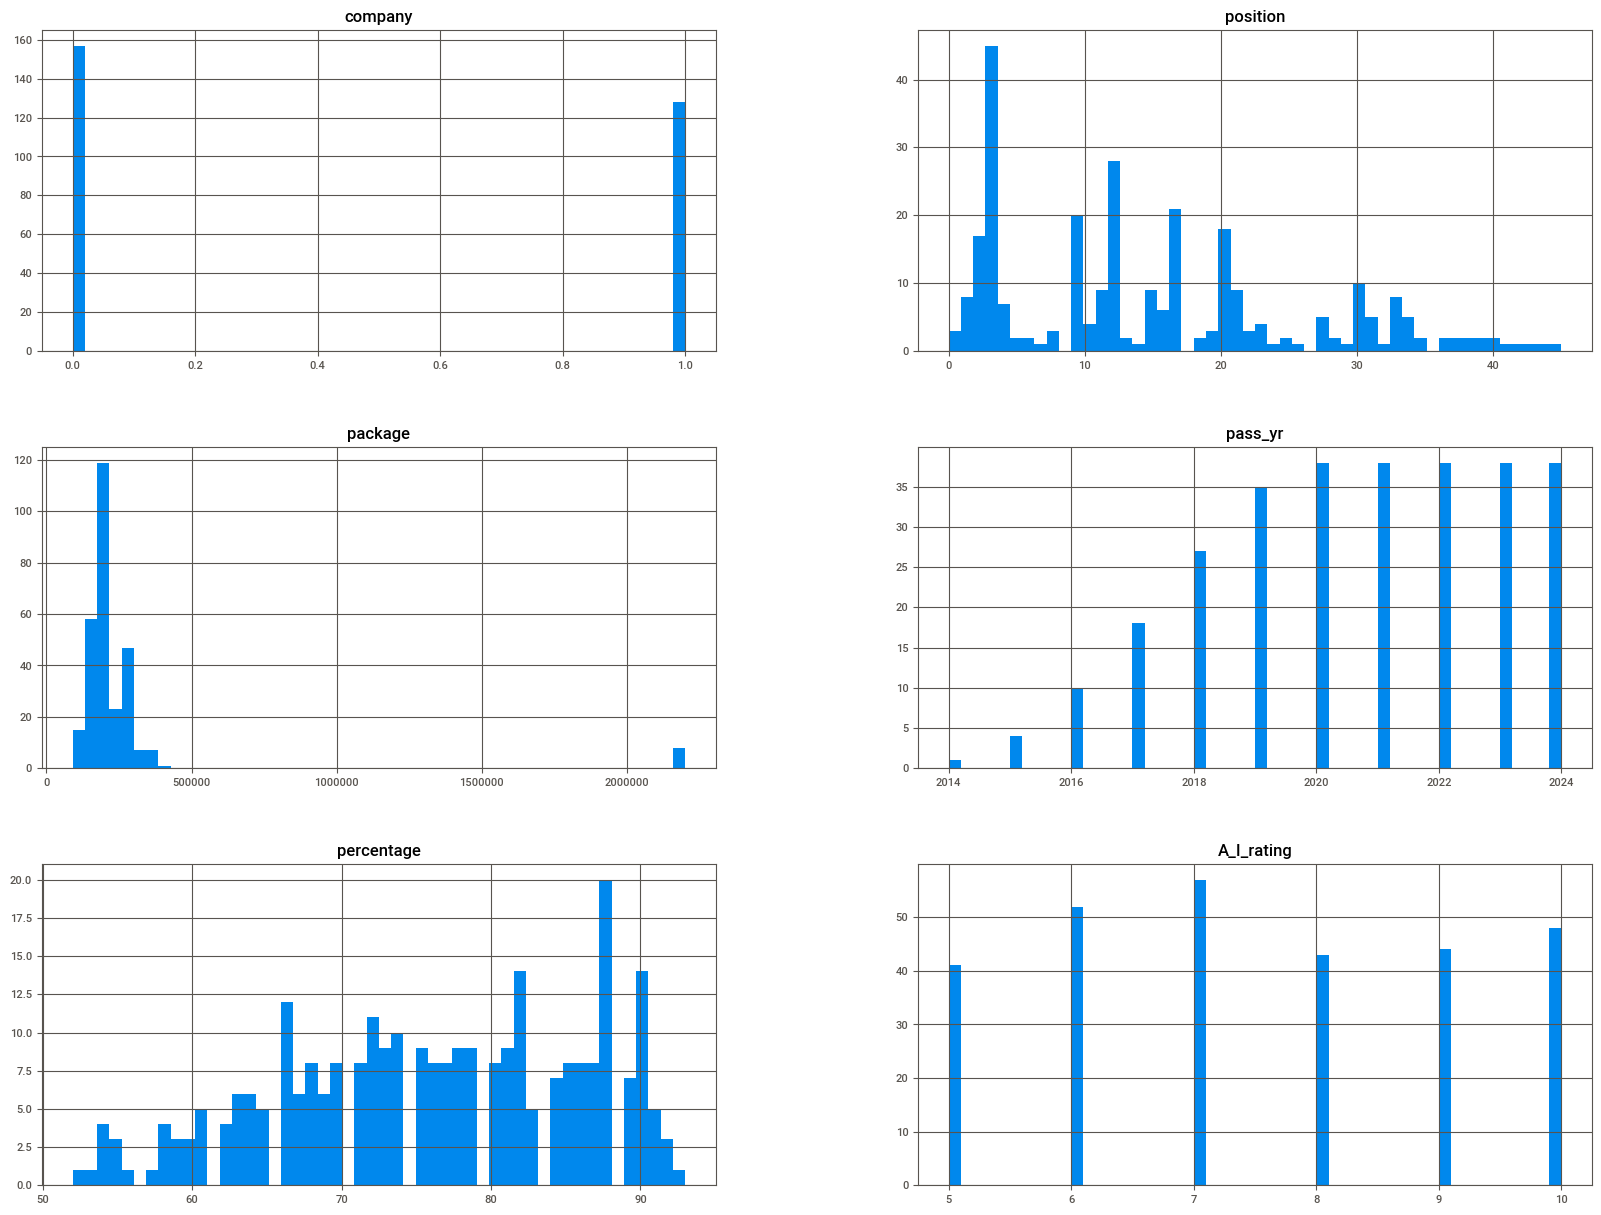

In [62]:
df.hist(bins=50, figsize=(20,15))

# Implementing algorithms

In [63]:
x = df.drop(columns=['package'], axis = 1)
y = df['package']

In [64]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train , y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [65]:
x_train.shape, x_test.shape, y_train.shape , y_test.shape

((228, 5), (57, 5), (228,), (57,))

## 1. Decision Tree algorithm

In [66]:
from sklearn.tree import DecisionTreeClassifier
model1 = DecisionTreeClassifier()
model1.fit(x_train, y_train)

DecisionTreeClassifier()

In [67]:
from sklearn.metrics import accuracy_score
y_pred1 = model1.predict(x_test)
acc1 = accuracy_score(y_test, y_pred1)
print("Accuracy score of Decision tree regressor model is = ",acc1)

Accuracy score of Decision tree regressor model is =  0.7017543859649122


## 2. Linear regression algorithm

In [68]:
from sklearn.linear_model import LinearRegression
model2 = LinearRegression()
model2.fit(x_train, y_train)

LinearRegression()

In [69]:
from sklearn.metrics import r2_score, mean_squared_error

y_pred2 = model2.predict(x_test)
mse2 = mean_squared_error(y_test, y_pred2)
r22 = r2_score(y_test, y_pred2)
print(f"Mean Squared Error: {mse2:.2f}")
print(f"R-squared Score: {r22:.2f}")

Mean Squared Error: 79836096902.15
R-squared Score: -0.12


## 3. Logistic Regression

In [70]:
from sklearn.linear_model import LogisticRegression
model3 = LogisticRegression()
model3.fit(x_train, y_train)

LogisticRegression()

In [71]:
y_pred3 = model3.predict(x_test)
mse3 = mean_squared_error(y_test, y_pred3)
r23 = r2_score(y_test, y_pred3)

print(f"Mean Squared Error: {mse3:.2f}")
print(f"R-squared Score: {r23:.2f}")

Mean Squared Error: 424977894.11
R-squared Score: 0.99


## 4. Naive Bayes algorithm

In [72]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

model4 = GaussianNB()

model4.fit(x_train, y_train)

# Make predictions
y_pred4 = model4.predict(x_test)

acc4 = accuracy_score(y_test, y_pred4)
conf_matrix4 = confusion_matrix(y_test, y_pred4)
class_report4 = classification_report(y_test, y_pred4)

print(f"Accuracy: {acc4:.2f}")


Accuracy: 0.44


## 5. Random Forest Algorithm

In [73]:
from sklearn.ensemble import RandomForestClassifier

model5 = RandomForestClassifier(n_estimators=100, random_state=42)
model5.fit(x_train, y_train)

y_pred5 = model5.predict(x_test)

# Evaluate the model
acc5 = accuracy_score(y_test, y_pred5)
print(f"Accuracy: {acc5:.2f}")

Accuracy: 0.58


In [76]:
inp = [0,1,2023,91,6]

#changing the input as numpy array
inp_np_array = np.asarray(inp)

#reshape data as we are predicting for one instance only
inp_reshape = inp_np_array.reshape(1,-1)

predict_dec_tree = model1.predict(inp_reshape)
print("Prediction using decision tree : ",predict_dec_tree)

predict_lin_reg = model2.predict(inp_reshape)
print("Prediction using Linear regression : ",predict_lin_reg)

predict_log_reg = model3.predict(inp_reshape)
print("Prediction using Logistic Regression : ",predict_log_reg)

predict_nav_bay = model4.predict(inp_reshape)
print("Prediction using Naive Bayes : ",predict_nav_bay)

predict_ran_for = model5.predict(inp_reshape)
print("Prediction using Random Forest : ",predict_ran_for)

Prediction using decision tree :  [154000]
Prediction using Linear regression :  [262895.10597867]
Prediction using Logistic Regression :  [190926]
Prediction using Naive Bayes :  [154000]
Prediction using Random Forest :  [154000]


In [74]:
df.head()

,company,position,package,pass_yr,percentage,A_I_rating
0,0,0,180000,2020,75,7
1,0,0,180000,2021,82,9
2,0,0,180000,2022,68,9
3,0,1,154000,2023,91,6
4,0,1,154000,2024,85,5


# **Deploying model using Flask**

In [80]:
with open('place.pkl', 'wb') as f:
    pickle.dump(model1, f)

In [ ]:
from flask import Flask
from flask import render_template
import pickle
import numpy as np
from flask import request

model1 = pickle.load(open('place.pkl', 'rb'))

app=Flask(__name__)

@app.route('/')
def index():
    return render_template('place_web.html')

@app.route('/result',methods=['POST'])
def get_value():
    company=(request.form['company'])
    position=(request.form['position'])
    passing_year=(request.form['passing_year'])
    percentage=(request.form['percentage'])
    a_i_rating=(request.form['a_i_rating'])
        
    arr = np.array([[company, position, passing_year, percentage, a_i_rating]])
    prediction = model1.predict(arr)
    print(prediction[0])
    
    return render_template('place_result.html',prediction=[prediction[0]])

if __name__=="__main__":
    app.run()


 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [08/Nov/2024 18:59:45] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [08/Nov/2024 18:59:45] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [08/Nov/2024 19:00:17] "POST /result HTTP/1.1" 200 -


180000


127.0.0.1 - - [08/Nov/2024 19:00:20] "GET / HTTP/1.1" 200 -
